In [1]:
import pandas as pd

In [2]:
yearly=pd.read_csv("yearly_deaths_by_clinic.csv")
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [3]:
yearly['propotion_deaths']= yearly['deaths']/yearly['births']

yearly1= yearly[yearly['clinic']=='clinic 1']

yearly2 = yearly[yearly['clinic']=='clinic 2']

print(yearly1)

   year  births  deaths    clinic  propotion_deaths
0  1841    3036     237  clinic 1          0.078063
1  1842    3287     518  clinic 1          0.157591
2  1843    3060     274  clinic 1          0.089542
3  1844    3157     260  clinic 1          0.082357
4  1845    3492     241  clinic 1          0.069015
5  1846    4010     459  clinic 1          0.114464


Text(0, 0.5, 'propotion_deaths')

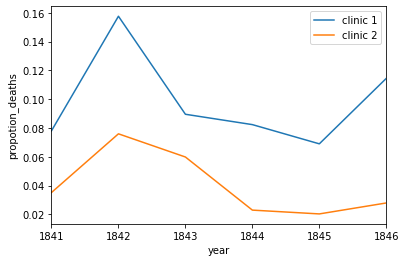

In [4]:
%matplotlib inline


ax = yearly1.plot(x="year", y="propotion_deaths",
              label="clinic 1")
yearly2.plot(x="year", y="propotion_deaths",
         label="clinic 2", ax=ax)
ax.set_ylabel("propotion_deaths")



In [5]:
monthly = pd.read_csv("monthly_deaths.csv", parse_dates=["date"])

In [6]:
monthly["propotion_deaths"]=monthly['deaths']/monthly['births']

monthly.head()

,date,births,deaths,propotion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Text(0, 0.5, 'propotion_deaths')

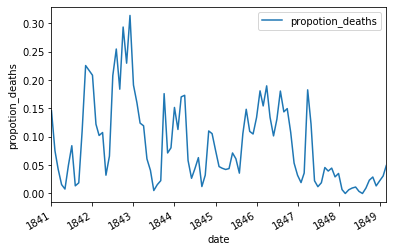

In [7]:
%matplotlib inline

ax = monthly.plot(x="date", y="propotion_deaths")
ax.set_ylabel("propotion_deaths")



Text(0, 0.5, 'propotion_deaths')

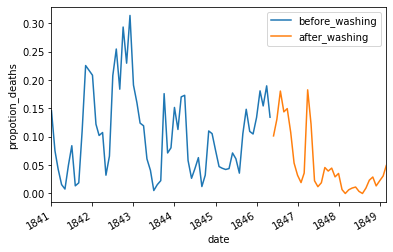

In [8]:
handwashing_start=pd.to_datetime('1846-06-01')

before_washing=monthly[monthly['date']<handwashing_start]
after_washing= monthly[monthly['date']>=handwashing_start]

%matplotlib inline
ax = before_washing.plot(x="date", y="propotion_deaths",
              label="before_washing")
after_washing.plot(x="date", y="propotion_deaths",
         label="after_washing", ax=ax)
ax.set_ylabel("propotion_deaths")


In [9]:
before_propotion=before_washing["propotion_deaths"]
after_propotion=after_washing["propotion_deaths"]

mean_diff = after_propotion.mean()-before_propotion.mean()
print(mean_diff)

-0.05432680040202613


In [12]:
boot_mean_difference=[]

for i in range (3000):
    boot_before = before_propotion.sample(frac=1, replace=True)
    boot_after = after_propotion.sample(frac=1, replace=True)
    boot_mean_difference.append(boot_after.mean()-boot_before.mean())
    
    
confidence_interval= pd.Series(boot_mean_difference).quantile([0.025, 0.975])
print(confidence_interval)

    

0.025   -0.080340
0.975   -0.029033
dtype: float64


In [13]:
doctors_should_wash_their_hands= True